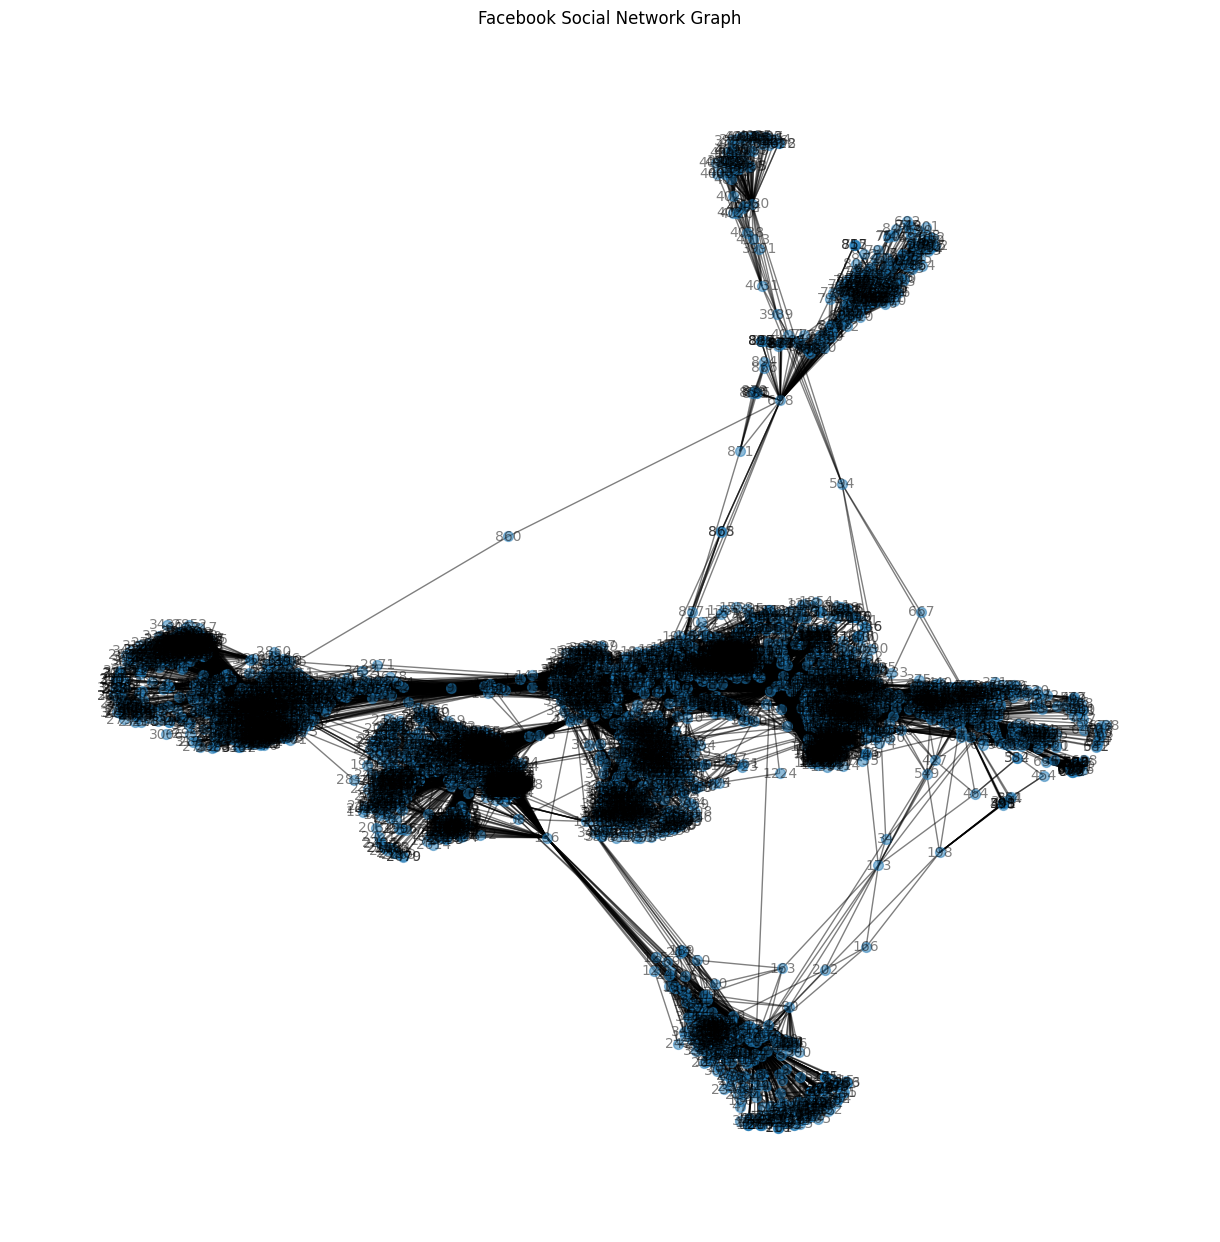

BFS Path from 0 to 1: [0, 1]


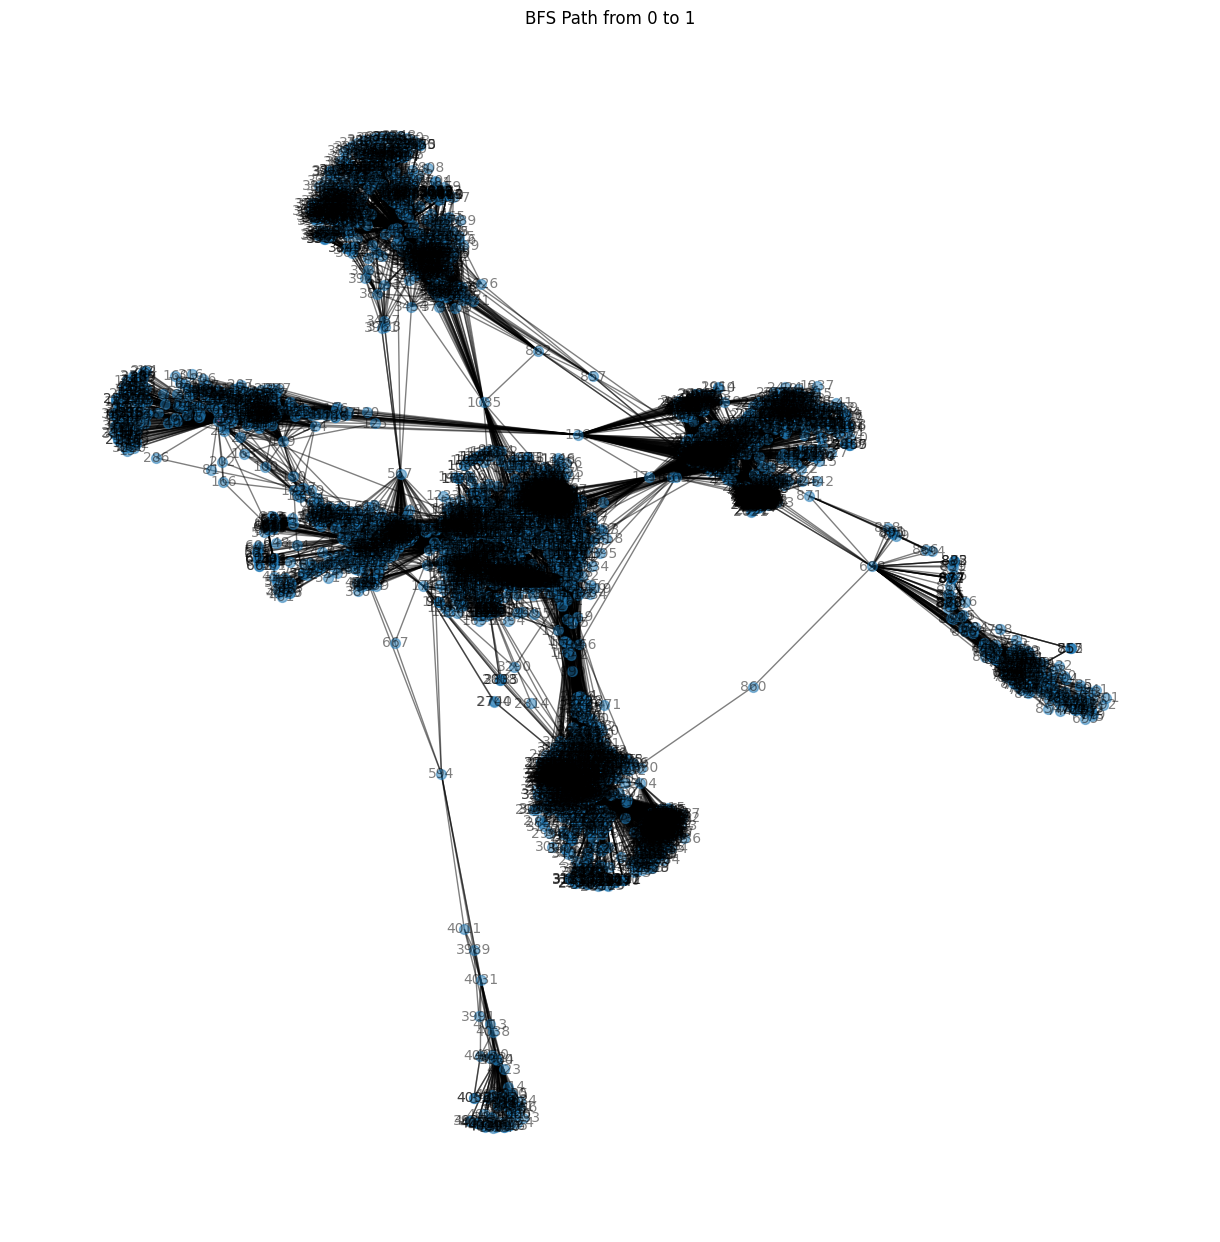

DFS Connections from 0: [0, 347, 339, 340, 324, 332, 331, 271, 342, 325, 313, 315, 345, 322, 341, 323, 308, 338, 252, 334, 318, 261, 314, 236, 304, 285, 303, 239, 344, 311, 277, 294, 77, 231, 329, 320, 346, 330, 302, 299, 300, 130, 257, 295, 258, 291, 280, 297, 272, 281, 309, 284, 251, 197, 184, 159, 172, 298, 265, 248, 200, 276, 232, 224, 213, 249, 266, 254, 242, 204, 196, 194, 187, 180, 101, 317, 158, 168, 129, 31, 237, 84, 83, 51, 25, 336, 88, 186, 223, 246, 136, 2660, 2659, 2658, 2657, 2648, 2647, 2645, 2640, 2639, 2636, 2633, 2627, 2620, 2626, 2585, 2538, 2494, 2583, 2459, 2531, 2616, 2653, 2642, 2649, 2643, 2629, 2609, 2598, 2635, 2533, 2597, 2608, 2617, 2652, 2603, 2610, 2641, 2557, 2637, 2540, 2634, 2421, 2437, 2204, 2034, 2321, 2581, 2565, 2017, 2296, 2612, 2566, 2523, 2488, 2644, 2628, 2618, 2614, 2656, 2562, 2448, 2440, 2577, 2587, 2570, 2535, 2487, 2301, 2281, 2245, 2094, 2167, 1912, 2655, 2654, 2646, 2638, 2630, 2631, 2625, 2624, 2623, 2615, 2619, 2611, 2607, 2606, 2604, 2

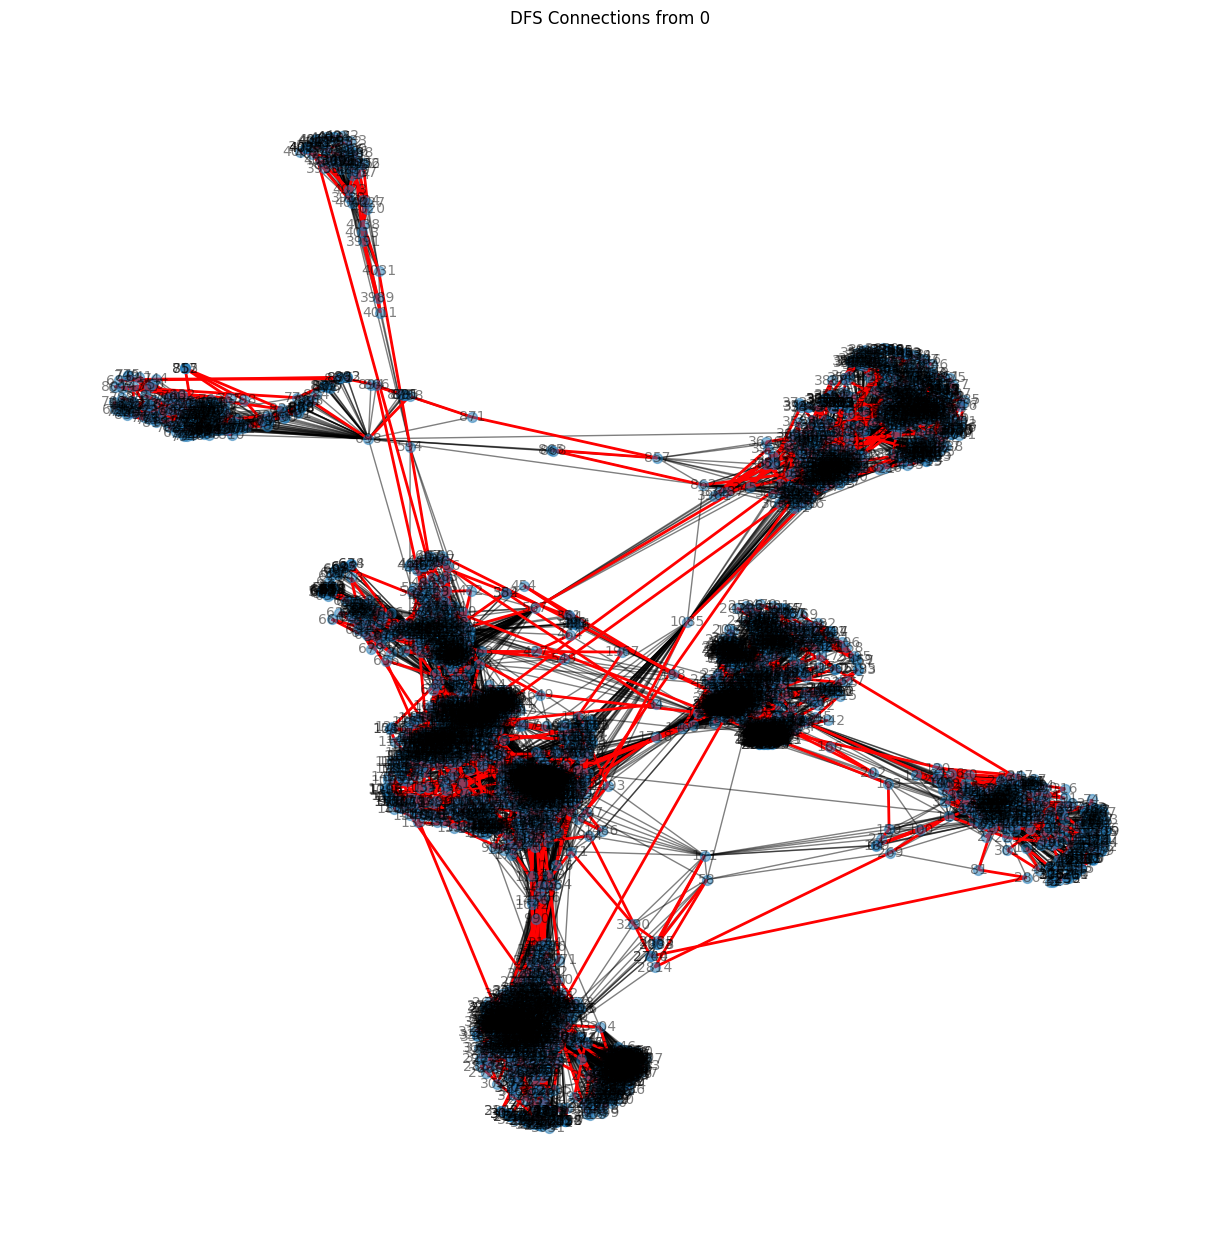

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
def load_data(file_path):

    G = nx.read_edgelist(file_path, comments='#', delimiter=' ', nodetype=int)
    return G

# Step 2: Implement BFS to Find the Shortest Path
def bfs(graph, start_user, end_user):
    visited = set()
    queue = [(start_user, [start_user])]

    while queue:
        current_user, path = queue.pop(0)
        if current_user == end_user:
            return path

        if current_user not in visited:
            visited.add(current_user)
            for neighbor in graph.neighbors(current_user):
                queue.append((neighbor, path + [neighbor]))

    return None

# Step 3: Implement DFS to Explore Connections
def dfs(graph, start_user):
    visited = set()
    stack = [start_user]
    connections = []

    while stack:
        current_user = stack.pop()
        if current_user not in visited:
            visited.add(current_user)
            connections.append(current_user)
            for neighbor in graph.neighbors(current_user):
                stack.append(neighbor)

    return connections

# Step 4: Visualize the Graph
def draw_graph(graph):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=50, font_size=10, alpha=0.5)
    plt.title("Facebook Social Network Graph")
    plt.show()

# Step 5: Visualize the Path
def draw_path(graph, path, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=50, font_size=10, alpha=0.5)

    # Highlight the path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title(title)
    plt.show()

# Main Execution
if __name__ == "__main__":

    file_path = 'facebook_combined.txt'
    G = load_data(file_path)

    # Draw the entire graph
    draw_graph(G)


    start_user = 0

    # Perform BFS
    bfs_path = bfs(G, start_user, 1)
    if bfs_path:
        print("BFS Path from {} to {}: {}".format(start_user, 1, bfs_path))
        draw_path(G, bfs_path, "BFS Path from {} to {}".format(start_user, 1))
    else:
        print("No path found using BFS from {} to {}".format(start_user, 1))

    # Perform DFS
    dfs_path = dfs(G, start_user)
    print("DFS Connections from {}: {}".format(start_user, dfs_path))
    draw_path(G, dfs_path, "DFS Connections from {}".format(start_user))